In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN,Dense, Flatten
from tensorflow.keras.utils import to_categorical

In [ ]:
#Load Mnist data
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_train=x_train/255.0
x_test=x_test/255.0

y_train=to_categorical(y_train,num_classes=10)
y_test=to_categorical(y_test,num_classes=10)

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
#Model parameters
#input shape = (28,28)    #Each image row(28pixel) is treated as timestamp
#hidden_units = 128
#num_classes = 10

#Create RNN model
model=Sequential()
model.add(SimpleRNN(units=128,input_shape=(x_train.shape[1],x_train.shape[2])))
model.add(Dense(units=10,activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
#compile th model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

#train the model
history=model.fit(x_train,y_train,epochs=10,batch_size=32,validation_data=(x_test,y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.9628 - loss: 0.1317 - val_accuracy: 0.9579 - val_loss: 0.1529
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.9624 - loss: 0.1315 - val_accuracy: 0.9585 - val_loss: 0.1477
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.9633 - loss: 0.1321 - val_accuracy: 0.9649 - val_loss: 0.1346
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9627 - loss: 0.1338 - val_accuracy: 0.9568 - val_loss: 0.1499
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.9621 - loss: 0.1327 - val_accuracy: 0.9534 - val_loss: 0.1682
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9592 - loss: 0.1436 - val_accuracy: 0.9213 - val_loss: 0.3001
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.9505 - loss: 0.1738 - val_accuracy: 0.9635 - val_loss: 0.1298
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.9541 - l

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 128)                 │          20,096 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 64,160 (250.63 KB)

 Trainable params: 21,386 (83.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 42,774 (167.09 KB)

In [ ]:
#Evaluate model
loss,accuracy=model.evaluate(x_test,y_test)
print(f"Test Accuracy:", accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9298 - loss: 0.2397
Test Accuracy: 0.9426000118255615


Text(0.5, 1.0, 'Training and validation loss')

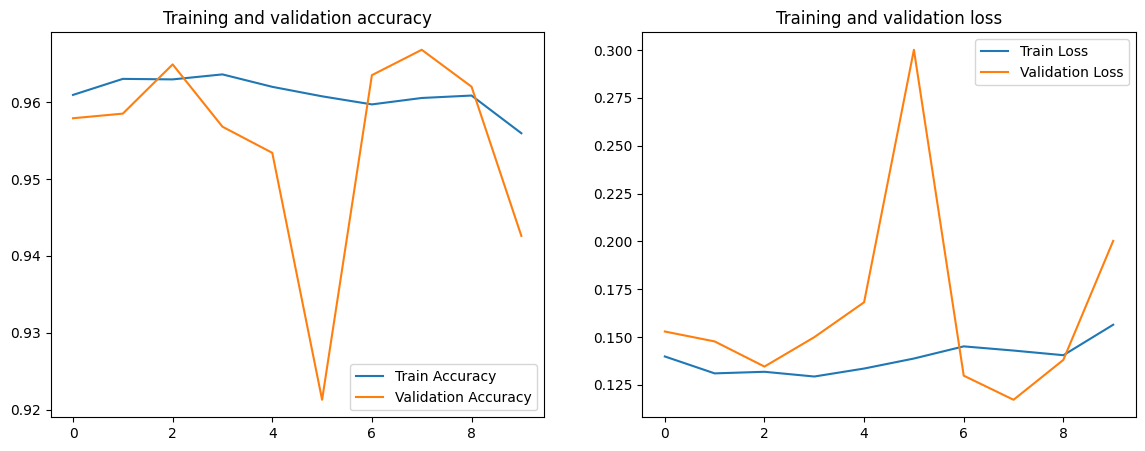

In [ ]:
#Plot training and validate accuracy and loss
import matplotlib.pyplot as plt
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],label='Train Accuracy')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title("Training and validation accuracy")

plt.subplot(1,2,2)
plt.plot(history.history['loss'],label='Train Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.legend(loc='upper right')
plt.title("Training and validation loss")